## Intro
Meteorological data is one of the most important data with high social (climate change, disastrous events etc.) and economical impact (climate change, flooding, drought, wildfire and other disastrous events etc.)
Envlib.org has extensive sets of New Zealand focused geospatial climate/environmental datasets that are easily accessible. In this course, we are going to use a 20 year numerical weather dataset provided by MetService that contains all the critical weather variables (wind speed, wind direction, near surface air temperature, soil moisture, air moisture, precipitation etc.). We are also processing the data in the meantime so you can access the same dataset on envlib.org in the future.

### Read a netcdf file

Netcdf (Network Common Data Form) file (*.nc) is a format that is widely used across scientific deciplines. It supports "the creation, access, and sharing of array-oriented scientific data" (https://www.unidata.ucar.edu/software/netcdf/).

In python, xarray is one of the best and also commonly used library when dealing with netcdf data.

In [2]:
import xarray as xr
import numpy as np # you can use numpy functions with xarray objects
import salem # this will help with plotting/projection 
import cartopy.crs as ccrs # an alternative way to handle plotting/projection yourself
import matplotlib.pyplot as plt

First, we need to use xarray to open/read the netcdf file. Using open_dataset function here. Another important function is open_mfdataset which can open multiple files and merge them automatically to a single dataset to use.

In [3]:
ds = xr.open_dataset("/mnt/data/MetService_WRF/RH_20200101000000.nc")

Dataset and dataarray are the fundamental data structures. Each dataarray object have dimensions associated with it and even some additional information in attributes.

### Indexing of multi demensional data

When indexing, a zero refers to the first place, NOT a zero measurement for that variable. e.g, ds.RH[0] pulls out the data relating the 1st measurement of height NOT the data with a height of zero

In [4]:
ds.RH # each variable in a dataset is called a dataarray OR as:
ds["RH"]

<xarray.DataArray 'RH' (height: 1, time: 744, lat: 508, lon: 472)>
[178393344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0

In [5]:
ds.RH[0,0,...]  #ds.RH[0,0] and ds.RH[0,0,:,:] are the same+

<xarray.DataArray 'RH' (lat: 508, lon: 472)>
[239776 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

In [6]:
ds.RH[0,0,5:10,...]  #ds.RH[0,0] and ds.RH[0,0,:,:] are the same

<xarray.DataArray 'RH' (lat: 5, lon: 472)>
array([[86.049355, 85.780266, 85.60962 , ..., 89.3605  , 89.31947 , 89.27025 ],
       [86.15929 , 85.8902  , 85.70971 , ..., 89.31947 , 89.2801  , 89.22923 ],
       [86.259384, 85.99029 , 85.81964 , ..., 89.2801  , 89.24072 , 89.18985 ],
       [86.32993 , 86.080536, 85.91973 , ..., 89.24072 , 89.1997  , 89.150475],
       [86.369316, 86.15929 , 86.00014 , ..., 89.18985 , 89.140625, 89.09961 ]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -47.86 -47.83 -47.81 -47.78 -47.75
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

In [7]:
ds["RH"].isel(height=0,time=0)

<xarray.DataArray 'RH' (lat: 508, lon: 472)>
[239776 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

In [8]:
ds.RH.isel(height=0,time=0,lat=range(5,10))

<xarray.DataArray 'RH' (lat: 5, lon: 472)>
array([[86.049355, 85.780266, 85.60962 , ..., 89.3605  , 89.31947 , 89.27025 ],
       [86.15929 , 85.8902  , 85.70971 , ..., 89.31947 , 89.2801  , 89.22923 ],
       [86.259384, 85.99029 , 85.81964 , ..., 89.2801  , 89.24072 , 89.18985 ],
       [86.32993 , 86.080536, 85.91973 , ..., 89.24072 , 89.1997  , 89.150475],
       [86.369316, 86.15929 , 86.00014 , ..., 89.18985 , 89.140625, 89.09961 ]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -47.86 -47.83 -47.81 -47.78 -47.75
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

You can also use values to get only the values of the dataarray, the return values will be in a numpy array that has the same dimesion of the original data

In [9]:
ds.RH.isel(height=0,time=0,lat=range(5,10)).values 

array([[86.049355, 85.780266, 85.60962 , ..., 89.3605  , 89.31947 ,
        89.27025 ],
       [86.15929 , 85.8902  , 85.70971 , ..., 89.31947 , 89.2801  ,
        89.22923 ],
       [86.259384, 85.99029 , 85.81964 , ..., 89.2801  , 89.24072 ,
        89.18985 ],
       [86.32993 , 86.080536, 85.91973 , ..., 89.24072 , 89.1997  ,
        89.150475],
       [86.369316, 86.15929 , 86.00014 , ..., 89.18985 , 89.140625,
        89.09961 ]], dtype=float32)

In [10]:
ds.sel(lat=slice(-40,-35),time=slice("2020-01-03","2020-01-10"))

<xarray.Dataset>
Dimensions:  (time: 192, lat: 182, lon: 472, height: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-03 ... 2020-01-10T23:00:00
  * lat      (lat) float64 -40.0 -39.97 -39.94 -39.91 ... -35.06 -35.03 -35.0
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0
Data variables:
    RH       (height, time, lat, lon) float32 ...

### 1D data plotting

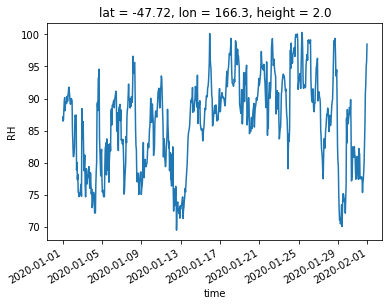

In [11]:
ds.RH[0,:,10,10].plot()

Click behind the last "." in the next line and hit "TAB" key on your keyboard. 

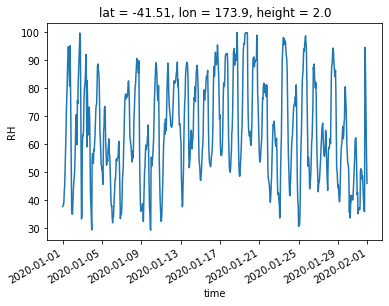

In [12]:
lat, long = -41.51, 173.92
ds.RH.sel(lat=lat, lon=long, method="nearest").plot()

In [13]:
ds.RH.sel(lat=lat, lon=long, method="nearest")

<xarray.DataArray 'RH' (height: 1, time: 744)>
array([[37.799915, 38.060806, 38.410294, ..., 64.30052 , 53.479427, 46.049873]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
    lat      float64 -41.51
    lon      float64 173.9
  * height   (height) float64 2.0

#### task
Use the isel/sel method to select and plot the time series (cities) for the whole day of 2020-01-01 (UTC).

### making spatial maps

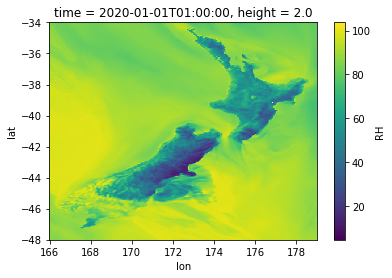

In [14]:
ds.RH[0,1,...].plot()

Default plotting will have projection issues. You can use salem functions to help you handle the projection issue automatically.

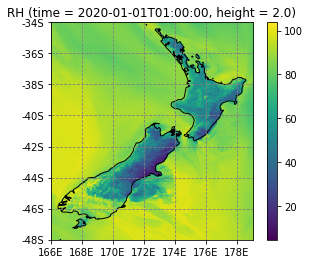

In [37]:
ds.RH[0,1,...].salem.quick_map()

#### task
1. Basic map plotting
    1. Change the color to a different colormap (https://matplotlib.org/stable/tutorials/colors/colormaps.html; https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
    2. Change the range of the colormap to 20 (minimum) and 100 (maximum).
2. Look at the change of RH throughout 2020-01-01.
3. Plot the histgram of the whole day. (hint: You need to select the data of that day before using hist plotting function)

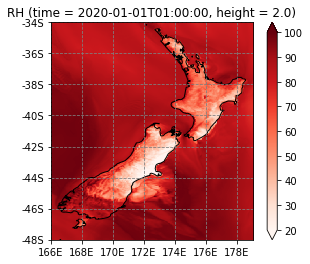

In [29]:
ds.RH[0,1,...].salem.quick_map(cmap="Reds", vmin=20, vmax=100)

(array([   328.,   1719.,   3128.,   4659.,   7602.,   9188.,   6950.,
         43044., 106879.,  56278.]),
 array([  4.3997383,  14.335782 ,  24.271826 ,  34.20787  ,  44.143913 ,
         54.079956 ,  64.016    ,  73.95205  ,  83.88809  ,  93.824135 ,
        103.76018  ], dtype=float32),
 <BarContainer object of 10 artists>)

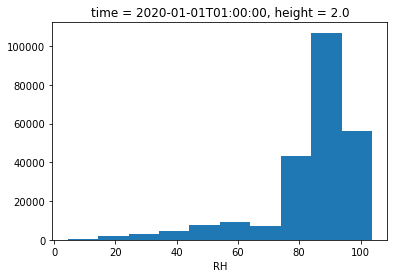

In [45]:
ds.RH[0,1,...].plot.hist()

### More maps
You can also use an advanced method that interacts with the Cartopy library (https://scitools.org.uk/cartopy/docs/latest/index.html) to manually handle the projection. This will give you more flexibility and is more customizable.

#### Quick matplotlib library intro

In [16]:
import matplotlib.pyplot as plt

##### figure and axes

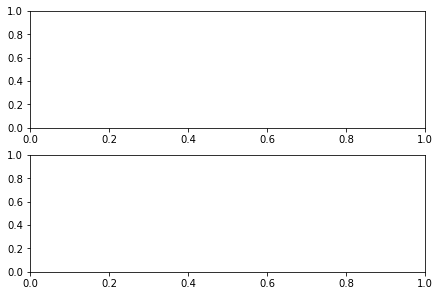

In [17]:
fig,axes = plt.subplots(2,constrained_layout=True)

"An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel())."  (https://matplotlib.org/stable/tutorials/introductory/usage.html)

In [18]:
axes[0].set_title("first")
axes[1].set_title("second")

Text(0.5, 1.0, 'second')

In [19]:
fig.axes[1].set_ylabel("second")

Text(3.1999999999999993, 0.5, 'second')

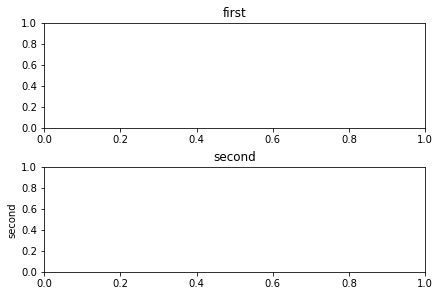

In [20]:
fig

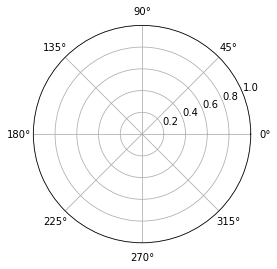

In [21]:
ax=plt.axes(projection='polar')
ax_same=plt.gca()
fig = plt.gcf()

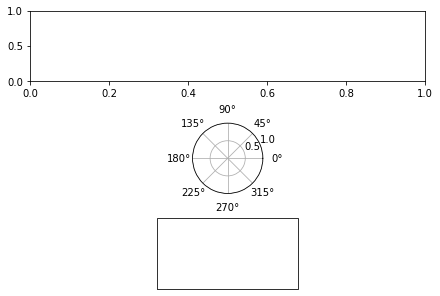

In [22]:
fig = plt.figure(constrained_layout=True)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312, projection='polar')
ax3 = plt.subplot(313, projection=ccrs.PlateCarree())

#### Using cartopy with salem

/opt/conda/envs/baseline/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


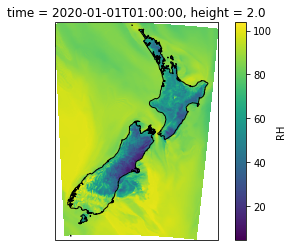

In [23]:
ax = plt.axes(projection=ccrs.Orthographic(170, -45))
ds.RH[0,1,...].plot(ax=ax, transform=ds.salem.cartopy()) # salem can give the data projection if possible.
ax.coastlines()

/opt/conda/envs/baseline/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


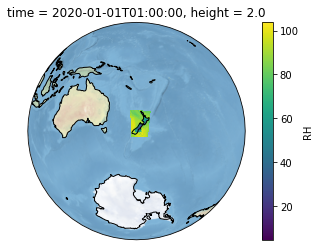

In [24]:
ax = plt.axes(projection=ccrs.Orthographic(170, -45))
ax.set_global();
ds.RH[0,1,...].plot(ax=ax, transform=ds.salem.cartopy());
ax.coastlines();
ax.stock_img()

/opt/conda/envs/baseline/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


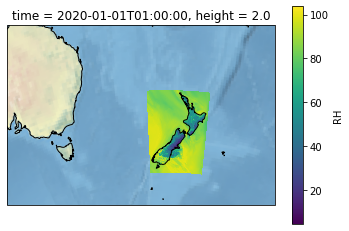

In [25]:
ax = plt.axes(projection=ccrs.Orthographic(170, -45))
ax.set_global();
ds.RH[0,1,...].plot(ax=ax, transform=ds.salem.cartopy());
ax.coastlines();
ax.set_extent((140,-170,-20,-50))
ax.stock_img()

#### Using cartopy directly

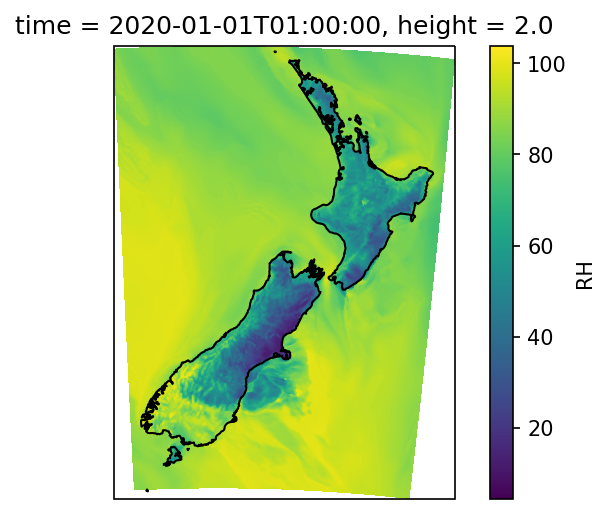

In [26]:
map_proj = ccrs.Orthographic(170,-45)
ds.RH[0,1,].plot(subplot_kws=dict(projection=map_proj),transform=ccrs.PlateCarree())
ax=plt.gca()     # get current ax
fig = plt.gcf()  # get current figure
ax.coastlines()
fig.set_dpi(150)

### Matrix analyis

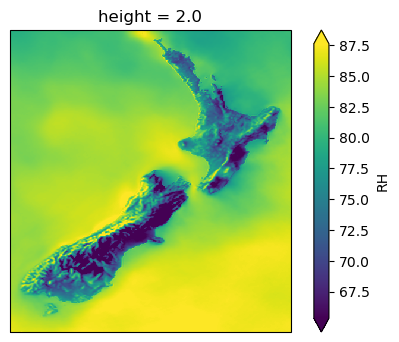

In [27]:
plt.figure(dpi=100)
ax=plt.axes(projection= ccrs.PlateCarree(170))
ds.RH.mean(dim="time").plot(ax=ax,transform=ccrs.PlateCarree(),robust=True)

Personally I would recommend the set_dpi than set_size_inches, the dpi will automatically scale while inches might have problems as below

There are many built-in functions you can use like max, min, argmax, argmin. Try to use "Tab" key to see all the availabe functions.

You can also write your own function using commen mathmatical operators. Xarray will by default apply the operator element wise.

In [ ]:
ds.RH**2 - ds.RH*3 +5 - np.sqrt(ds.RH)

### task
1. Read u velocity component (U_20000101000000.nc) and v velocity component (V_20000101000000.nc) and calculate the wind speed at 10m height.
2. Following question 1, produce a map of the average wind speed at 10m height.
3. Compare the RH map and the velocity map, are there any connections between the two?

In [54]:
u_dataset = xr.open_dataset("/mnt/data/MetService_WRF/U_20000101000000.nc")
v_dataset = xr.open_dataset("/mnt/data/MetService_WRF/V_20000101000000.nc")

windspeed_10m = np.sqrt(u_dataset.U.sel(height=10)**2 + v_dataset.V.sel(height=10)**2)

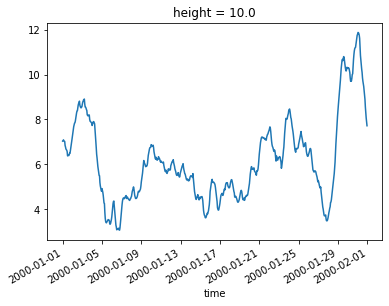

In [64]:
windspeed_10m.mean(dim=["lat", "lon"]).plot()

### Useful materials (Optional for curious minds)
If you are interested in how to produce nice maps, there are some nice resources you can look into.
1. https://youtu.be/6gdNUDs6QPc?list=PLlHygLBrUU2iDSU-5iGu6Qd6vjV6aDqF2 "Anatomy of Matplotlib". This video is a scipy conference workshop recording delivered by the contributors who developed the matplotlib library. Matplotlib is the library that works underneath the above functions that plot the figures.
2. Tutorials for xarray (https://docs.xarray.dev/en/stable/tutorials-and-videos.html).
3. https://github.com/SciTools/cartopy-tutorial is a good tutorial for cartopy with the accompanied tutorial video (https://www.youtube.com/watch?v=TE4uXbkHK_Y&t=3121s)